## Bayes Classifier with Hidden Markov Model emissions Coin Toss

author: Nicholas Farn [<a href="sendto:nicholasfarn@gmail.com">nicholasfarn@gmail.com</a>],
        Jacob Schreiber [<a href="sendto:jmschreiber91@gmail.com">jmschreiber91@gmail.com</a>]
        
In this example we will be using a simple Hidden Markov Model to demonstrate how it can be used in a Bayes classifier. In this particular example we have a couple friends who enjoy playing a game of chance. Someone tosses a coin and whenever it lands on heads, the tosser gains \$1, otherwise he pays \$1. However some of our friends are prone to using rigged coins in order to come out ahead in the long run.

Players fall into 3 categories, non-cheaters, smart cheaters, and dumb cheaters. Non-cheaters, as the name implies, do not use rigged coins. Smart cheaters make sure to switch between rigged and unrigged coins in order to keep the deception going. Dumb cheaters only use rigged coins.

In [12]:
from protopunica import *
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Let's start by creating our hmm's. Since this is a simple example, we will only have 2 states, rigged and unrigged, with discrete distributions.

In [3]:
rigged = State(DiscreteDistribution({"H": 0.8, "T": 0.2}), name="rigged")
unrigged = State(DiscreteDistribution({"H": 0.5, "T": 0.5}), name="unrigged")

Now let's create our non-cheater and dumb cheater since their hmm's consist of a single state.

In [4]:
non_cheater = HiddenMarkovModel(name="non-cheater")
non_cheater.add_state(unrigged)

dumb_cheater = HiddenMarkovModel(name="dumb-cheater")
dumb_cheater.add_state(rigged)

We can now add our starting states to our models.

In [5]:
non_cheater.start = unrigged
dumb_cheater.start = rigged

We can also add the transitions to our non-cheater and dumb cheater.

In [6]:
non_cheater.add_transition(unrigged, unrigged, 1)
dumb_cheater.add_transition(rigged, rigged, 1)

Now we bake our models to finalize the structure.

In [7]:
non_cheater.bake()
dumb_cheater.bake()

Now we can create our smart cheater.

In [8]:
smart_cheater = HiddenMarkovModel(name="smart-cheater")

The structure of our smart cheater hmm should look like the following.

Let's add in our starting transitions. Smart cheaters start out half the time with an unrigged coin, half the time without.

In [9]:
smart_cheater.add_transition(smart_cheater.start, unrigged, 0.5)
smart_cheater.add_transition(smart_cheater.start, rigged, 0.5)

Then we can add our transition matrix.

In [10]:
smart_cheater.add_transition(rigged, rigged, 0.5)
smart_cheater.add_transition(rigged, unrigged, 0.5)
smart_cheater.add_transition(unrigged, rigged, 0.5)
smart_cheater.add_transition(unrigged, unrigged, 0.5)

Finally we can bake the model to finalize its structure.

In [11]:
smart_cheater.bake()

We can view the structures of all our hmm's in the images below.

/tmp/ipykernel_55859/3030853643.py:2: UserWarning: Install pygraphviz for nicer visualizations
  smart_cheater.plot()
/tmp/ipykernel_55859/3030853643.py:5: UserWarning: Install pygraphviz for nicer visualizations
  dumb_cheater.plot()
/tmp/ipykernel_55859/3030853643.py:8: UserWarning: Install pygraphviz for nicer visualizations
  non_cheater.plot()


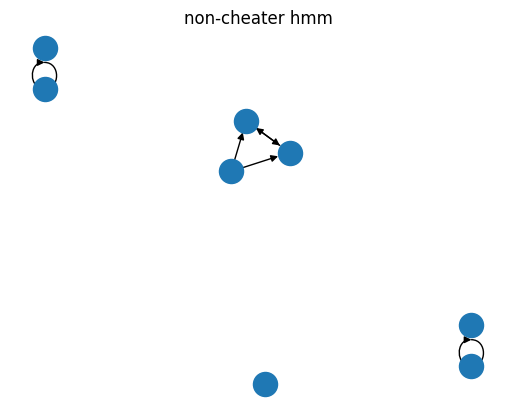

In [13]:
plt.title("smart cheater hmm")
smart_cheater.plot()

plt.title("dumb cheater hmm")
dumb_cheater.plot()

plt.title("non-cheater hmm")
non_cheater.plot()

Now we can finally create our Naive Bayes classifier. We'll let 0 stand for a non-cheater, 1 stand for a smart cheater, and 2 stand for a dumb cheater.

In [14]:
players = BayesClassifier([non_cheater, smart_cheater, dumb_cheater])

Now let's create a sequence of coin tosses to test our classifier on.

In [15]:
data = np.array(
    [
        list("HHHHHTHTHTTTTHHHTHHTTHHHHHTH"),
        list("HHHHHHHTHHHHTTHHHHHHHTTHHHHH"),
        list("THTHTHTHTHTHTTHHTHHHHTTHHHTT"),
    ]
)

We can now check the log probability of each string of data occurring under each model.

In [16]:
probs = players.predict_proba(data)

for i in range(len(probs)):
    print(
        "For sequence {}, {:.3}% non-cheater, {:.3}% smart cheater, {:.3}% dumb cheater.".format(
            i + 1, 100 * probs[i][0], 100 * probs[i][1], 100 * probs[i][2]
        )
    )

For sequence 1, 21.4% non-cheater, 68.0% smart cheater, 10.6% dumb cheater.
For sequence 2, 0.173% non-cheater, 12.1% smart cheater, 87.7% dumb cheater.
For sequence 3, 66.5% non-cheater, 33.0% smart cheater, 0.515% dumb cheater.


Finally we can classify whether a non-cheater (0), smart cheater (1), or dumb cheater (2) created the string of data.

In [17]:
output = players.predict(data)

for i in range(len(output)):
    print(
        "Sequence {} is a {}".format(
            i + 1,
            "non-cheater"
            if output[i] == 0
            else "smart cheater"
            if output[i] == 1
            else "dumb cheater",
        )
    )

Sequence 1 is a smart cheater
Sequence 2 is a dumb cheater
Sequence 3 is a non-cheater


We can also train our hmm's through Naive Bayes. Let's used the following data, all marked as known games for smart cheaters.

In [18]:
X = np.array([list("HHHHHTHTHTTTTH"), list("HHTHHTTHHHHHTH")])

y = np.array([1, 1])

Now let's fit our Bayes classifier to our data.

In [19]:
players.fit(X, y)

{
    "class" : "BayesClassifier",
    "models" : [
        {
            "class" : "HiddenMarkovModel",
            "name" : "non-cheater",
            "start" : {
                "class" : "State",
                "distribution" : {
                    "class" : "Distribution",
                    "dtype" : "str",
                    "name" : "DiscreteDistribution",
                    "parameters" : [
                        {
                            "H" : 0.49218749999999994,
                            "T" : 0.5078125000000001
                        }
                    ],
                    "frozen" : false
                },
                "name" : "unrigged",
                "weight" : 1.0
            },
            "end" : {
                "class" : "State",
                "distribution" : null,
                "name" : "non-cheater-end",
                "weight" : 1.0
            },
            "states" : [
                {
                    "class" : "State",
  